<a href="https://colab.research.google.com/github/ls90911/AHRS_simulation/blob/master/convergence_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import pdb
#!pip install pixiedust
#import pixiedust

In [0]:
class Drone_Simulation:
  def __init__(self, intial_states,sim_time,sim_step):
    self.states = np.zeros((int(sim_time/sim_step),3))
    self.inputs = np.zeros((int(sim_time/sim_step),2))
    self.vel_cmd = np.zeros((int(sim_time/sim_step),1))
    self.time = np.zeros((int(sim_time/sim_step),1))
    self.states[0,:]= intial_states
    self.sim_time = sim_time
    self.sim_step = sim_step
    
  def drone_model(self,current_states,inputs):
    g = 9.81
    x = current_states[0]
    y = current_states[1]
    vy = current_states[2]
    
    vx = inputs[0]
    phi = inputs[1]
    
    dx = vx
    dy = vy
    dvy = g* math.tan(phi) - 0.5 * math.cos(phi) * math.cos(phi) * vy
    dStates = np.array([dx,dy,dvy])
    return dStates
  
  def sim_run(self,y_ref,kp,kv):
    through_gate = False
    flag_calculate_deviation = False
    for i in range(np.size(self.states,0)):
      if i == 0:
        continue
      self.time[i] = i * self.sim_step
      self.vel_cmd[i-1] = kp*(y_ref-self.states[i-1,1])
      vx = 1.5
      self.inputs[i-1,:] = np.array([vx,self.bound_input(kv * (self.vel_cmd[i-1]-self.states[i-1,2]),30/180*3.14)]) 
      self.states[i,:] = self.states[i-1,:] + self.sim_step * self.drone_model(self.states[i-1,:],self.inputs[i-1,:])
      
      if abs(self.states[i,0]) < 0.05 and  abs(self.states[i,1]) < 0.4:
        through_gate = through_gate or True 
      else:
        through_gate = through_gate or False
      
      if abs(self.states[i,0]) < 0.05:
        flag_calculate_deviation = True
        deviation = abs(self.states[i,1])
        
    return through_gate, deviation
  
  def bound_input(self,input,boundary):
    if input > boundary:
      input = boundary
    elif input < -boundary:
      input = -boundary
    return input
        
   
  def plot_result(self,fig_num,through_gate):
    mpl.style.use('seaborn')
    plt.figure(fig_num)
    ax1 = plt.subplot(1,1,1)
    gate_1 = np.array([0,0])
    gate_2 = np.array([-0.5,0.5])
    ax1.plot(gate_1,gate_2,linewidth=5.0,color='orange')
    if through_gate:
      ax1.plot(self.states[:,0],self.states[:,1],'C1',alpha=0.5)
    else:
      ax1.plot(self.states[:,0],self.states[:,1],'C2',alpha=0.5)  
    plt.xlabel('x[m]')
    plt.ylabel('y[m]')
  
  

(True, 0.1230922759483482)
0.1230922759483482


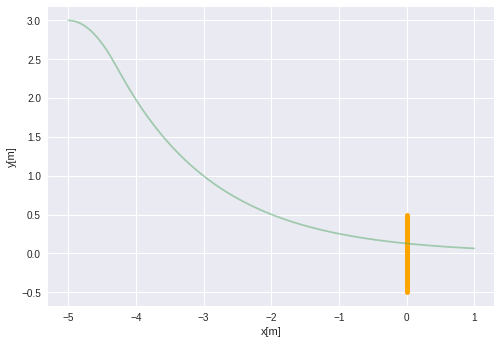

In [5]:
x0 = -5
y0 = 3
vy0 = 0
ds = Drone_Simulation(np.array([x0,y0,vy0]),4,1/500)

kp = 1
kv = 2
y_ref = 0
through_gate,deviation = ds.sim_run(y_ref,kp,kv)


ds.plot_result(2,through_gate)

print(through_gate)
print(deviation)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationW

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.

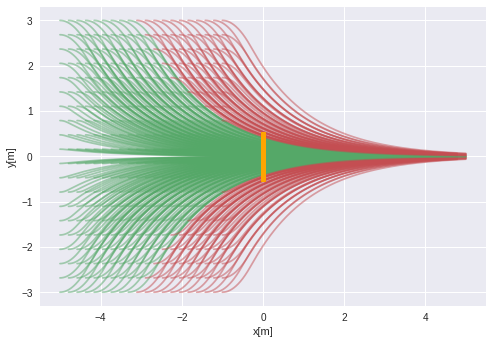

In [37]:
x_min = -5
x_max = -1
y_min = -3
y_max = 3

x0 = np.linspace(x_min,x_max, num=20)
y0 = np.linspace(y_min, y_max, num=20)
deviations = np.zeros((np.size(x0),np.size(y0)))
through_gates = np.zeros((np.size(x0),np.size(y0)))
                      
                      
for i in range(np.size(x0)):
  for j in range(np.size(y0)):
    ds = Drone_Simulation(np.array([x0[i],y0[j],0]),4,1/500)
    through_gates[i,j],deviations[j,i] = ds.sim_run(y_ref,kp,kv)
    ds.plot_result(2,through_gates[i,j])

print(through_gates)

In [0]:
def find_border(through_gate_mat,left_right):
  border = np.zeros((np.size(through_gate_mat,0),2))
  p = 0
  for i in range(np.size(through_gate_mat,0)):
    for j in range(np.size(through_gate_mat,0)-1):
      if left_right: 
        if through_gate_mat[i,j] == 0 and  through_gate_mat[i,j+1] == 1:
          border[p,:] = np.array([x0[i],y0[j+1]])
          p = p + 1
      else:
        if through_gate_mat[i,j] == 1 and  through_gate_mat[i,j+1] == 0:
          border[p,:] = np.array([x0[i],y0[j]])
          p = p + 1
  border = border[0:(p),:]
  return border

def plot_border(fig_num,border):
  plt.figure(fig_num)
  plt.plot(border[:,0],border[:,1],color='black')

[[-3.10526316 -2.68421053]
 [-2.89473684 -2.36842105]
 [-2.68421053 -2.05263158]
 [-2.47368421 -1.73684211]
 [-2.26315789 -1.42105263]
 [-2.05263158 -1.42105263]
 [-1.84210526 -1.10526316]
 [-1.63157895 -1.10526316]
 [-1.42105263 -0.78947368]
 [-1.21052632 -0.78947368]
 [-1.         -0.47368421]]


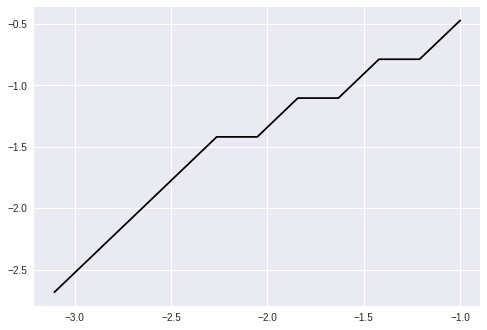

In [41]:
border = find_border(through_gates,1)
print(border)
plot_border(2,border)